Para generar datasets sintéticos: https://guoguibing.github.io/librec/datagen.html

## DISCLAIMER! Notebooks

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

/var/folders/vj/99bcmf5n4vlfs7qdf72qx4500000gp/T/ipykernel_7567/913326781.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv("../data/toy_example.csv")
data.iloc[[10,48,61], 0] = np.nan
data.iloc[[22, 34], 1] = np.nan
data.head()

,antiguedad,n_medio_productos,impago
0,4.225,1.20,0
1,5.175,1.40,0
2,6.325,1.55,0
3,7.275,1.60,0
4,8.075,1.45,0


In [4]:
data.describe()

,antiguedad,n_medio_productos,impago
count,93.000000,94.000000,96.000000
mean,4.822312,3.442553,0.416667
std,2.698202,1.306517,0.495595
min,0.425000,1.200000,0.000000
25%,2.375000,2.362500,0.000000
50%,5.125000,3.350000,0.000000
75%,7.225000,4.575000,1.000000
max,9.475000,5.700000,1.000000


<Axes: xlabel='antiguedad', ylabel='n_medio_productos'>

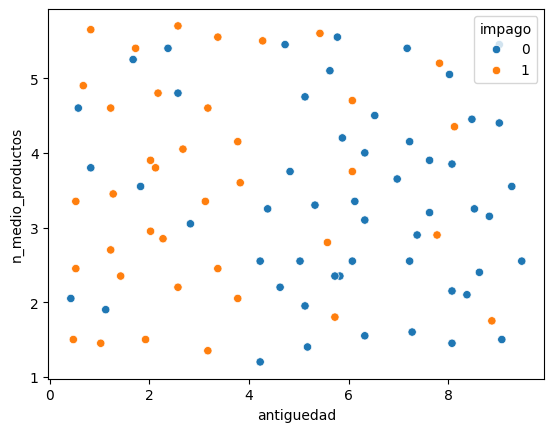

In [5]:
sns.scatterplot(data = data, x='antiguedad', y='n_medio_productos', hue='impago')

## 1st Round
* **STAKEHOLDER**:
    - Necesito clasificar a mis clientes en función a su riesgo de impago en base a su antigüedad como cliente y el número medio de productos al año.
* **DATA SCIENTIST**:
    - Sure! Voy a usar un vecinos próximos (k-NN) que en sencillito y el problema no parece muy complicado.
    - Por supuesto yo sé que en el caso de k-NN tengo que normalizar los datos e imputar missing values. También voy a dividir mis datos en training y test y sé que el cojunto de test no lo puedo utilizar para nada, más que para evaluar el resultado final de mi modelo.
    - ¡Manos a la obra!

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='impago').copy()
y = data['impago'].copy()

# SET a random_state to make your pipeline reproducible!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TRAIN

In [7]:
## TRAIN

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X_train)

X_train_transf = ss.transform(X_train)

clf = KNeighborsClassifier(n_neighbors=5)

# TODO: uncomment to get the error for the slides
#clf.fit(X_train_transf, y_train)

- He empezado por el modo en que alguien sabe usar sklearn básico y no se hace los cálculos "a mano".
- Diagrama en mi cabeza...

Accuracy in train:  1.0


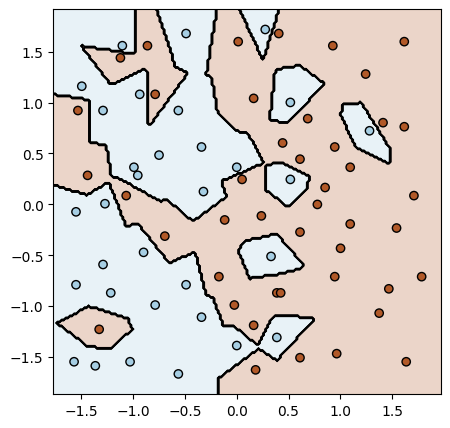

In [8]:
## TRAIN
from sklearn.impute import SimpleImputer
from plot_decision_boundary import plot_decision_boundary
from sklearn.metrics import accuracy_score

ss = StandardScaler(with_mean=True, with_std=True)
X_train_transform_ss = ss.fit_transform(X_train)

si = SimpleImputer(strategy='mean')
X_train_transform_ss_si = si.fit_transform(X_train_transform_ss)

clf = KNeighborsClassifier(n_neighbors=1)

clf.fit(X_train_transform_ss_si, y_train)

plot_decision_boundary(clf, X_train_transform_ss_si, y_train)

print("Accuracy in train: ", accuracy_score(y_train, clf.predict(X_train_transform_ss_si)))


# DISCLAIMER: model registry
with open(os.path.join('pkl','round_1','standard_scaler.pkl'),'wb') as f:
    pickle.dump(ss,f)

with open(os.path.join('pkl','round_1','simple_imputer.pkl'),'wb') as f:
    pickle.dump(si,f)

with open(os.path.join('pkl','round_1','knn.pkl'),'wb') as f:
    pickle.dump(clf,f)

### PREDICT
- Drama

In [9]:
# load
with open(os.path.join('pkl','round_1','standard_scaler.pkl'), 'rb') as f:
    ss = pickle.load(f)

with open(os.path.join('pkl','round_1','simple_imputer.pkl'), 'rb') as f:
    si = pickle.load(f)

with open(os.path.join('pkl','round_1','knn.pkl'), 'rb') as f:
    clf = pickle.load(f)

X_test_transf_ss = ss.transform(X_test)
X_test_transf_ss_si = si.transform(X_test_transf_ss)
prediction = clf.predict(X_test_transf_ss_si)

print("Accuracy in test: ", accuracy_score(y_test, prediction))

Accuracy in test:  0.6


# 2nd Round

### TRAIN

In [10]:
ss = StandardScaler(with_mean=True, with_std=True)
X_train_transform_ss = ss.fit_transform(X_train)

si = SimpleImputer(strategy='mean')
X_train_transform_ss_si = si.fit_transform(X_train_transform_ss)

clf_1 = KNeighborsClassifier(n_neighbors=1)
clf_1.fit(X_train_transform_ss_si, y_train)

clf_3 = KNeighborsClassifier(n_neighbors=3)
clf_3.fit(X_train_transform_ss_si, y_train)

print("Accuracy in train k=1: ", 
      accuracy_score(y_train, clf_1.predict(X_train_transform_ss_si)))
print("Accuracy in train k=3: ", 
      accuracy_score(y_train, clf_3.predict(X_train_transform_ss_si)))


# save: DISCLAIMER: model registry
with open(os.path.join('pkl','round_2','standard_scaler.pkl'),'wb') as f:
    pickle.dump(ss,f)

with open(os.path.join('pkl','round_2','simple_imputer.pkl'),'wb') as f:
    pickle.dump(si,f)

with open(os.path.join('pkl','round_2','knn_1.pkl'),'wb') as f:
    pickle.dump(clf_1,f)

with open(os.path.join('pkl','round_2','knn_3.pkl'),'wb') as f:
    pickle.dump(clf_3,f)

Accuracy in train k=1:  1.0
Accuracy in train k=3:  0.75


### TEST
- ¡Me quedo con k=3! **¡¡¡ERROR!! He usado el conjujnto de test para tomar la decisión**

In [11]:
with open(os.path.join('pkl','round_2','standard_scaler.pkl'), 'rb') as f:
    ss = pickle.load(f)

with open(os.path.join('pkl','round_2','simple_imputer.pkl'), 'rb') as f:
    si = pickle.load(f)

with open(os.path.join('pkl','round_2','knn_1.pkl'), 'rb') as f:
    clf_1 = pickle.load(f)

with open(os.path.join('pkl','round_2','knn_3.pkl'), 'rb') as f:
    clf_3 = pickle.load(f)

X_test_transf_ss = ss.transform(X_test)
X_test_transf_ss_si = si.transform(X_test_transf_ss)

print("Accuracy in test: ", accuracy_score(y_test, clf_1.predict(X_test_transf_ss_si)))
print("Accuracy in test: ", accuracy_score(y_test, clf_3.predict(X_test_transf_ss_si)))

Accuracy in test:  0.6
Accuracy in test:  0.7


## Round 3
- ¡Cierto! Recuerdo que me comentaron el tema este de la validación cruzada...
- Puedo decidir el número de vecinos próximos sin hacer cheating y mirar al conjunto de test

In [13]:
from sklearn.model_selection import GridSearchCV

ss = StandardScaler(with_mean=True, with_std=True)
X_train_transform_ss = ss.fit_transform(X_train)

si = SimpleImputer(strategy='mean')
X_train_transform_ss_si = si.fit_transform(X_train_transform_ss)

clf = KNeighborsClassifier()

# Puedes poner tu propia métrica
cv = GridSearchCV(clf, 
                  param_grid = {'n_neighbors': [1, 3, 5]},
                  scoring = 'accuracy', refit = True,
                  cv = 3,
                 return_train_score=True)

cv.fit(X_train_transform_ss_si, y_train)
                  

cv_results = pd.DataFrame(cv.cv_results_)
display(cv_results[['param_n_neighbors', 'mean_train_score', 'mean_test_score', 'rank_test_score']])

display(cv.best_estimator_.get_params())

# save: DISCLAIMER: model registry
with open(os.path.join('pkl','round_3','standard_scaler.pkl'),'wb') as f:
    pickle.dump(ss,f)

with open(os.path.join('pkl','round_3','simple_imputer.pkl'),'wb') as f:
    pickle.dump(si,f)

# WATCH OUT!
with open(os.path.join('pkl','round_3','knn.pkl'),'wb') as f:
    pickle.dump(cv.best_estimator_,f)

,param_n_neighbors,mean_train_score,mean_test_score,rank_test_score
0,1,1.000000,0.566154,3
1,3,0.815556,0.631282,2
2,5,0.775948,0.723077,1


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### TEST

In [14]:
with open(os.path.join('pkl','round_3','standard_scaler.pkl'), 'rb') as f:
    ss = pickle.load(f)

with open(os.path.join('pkl','round_3','simple_imputer.pkl'), 'rb') as f:
    si = pickle.load(f)

with open(os.path.join('pkl','round_3','knn.pkl'), 'rb') as f:
    clf = pickle.load(f)


X_test_transf_ss = ss.transform(X_test)
X_test_transf_ss_si = si.transform(X_test_transf_ss)

print("Accuracy in test: ", accuracy_score(y_test, clf.predict(X_test_transf_ss_si)))

Accuracy in test:  0.55


## Round 4
- Data leakage en el preprocesado! El CV también hay que hacerlo sobre el preprocesado para:
  1. Asegurar que los datos de los folds de CV son "vírgenes" y miden lo mejor posible el poder de generalización.
  2. Poder ajustar hiperparámetros sobre los algoritmos de preprocesado. ¡Sí! Hiperparámetros en el preprocesado!

## Train
- Remarcar que podemos poner todos los transformers que queramos y un (opcionalmente) estimador al final
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn import set_config

set_config(display="diagram")

pl=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier',KNeighborsClassifier())
])

my_param_grid = [
    {
     'imputer__strategy': ['mean', 'median'],
     'feature_selection__k': [1,2],
     'classifier__n_neighbors': [1, 3, 5],
    }
]

cv = GridSearchCV(pl, 
                  param_grid = my_param_grid,
                  scoring = 'accuracy', refit = True,
                  cv = 3,
                 return_train_score=True)

cv.fit(X_train,y_train)

cv_results = pd.DataFrame(cv.cv_results_).sort_values(by="rank_test_score")
display(cv_results[['param_imputer__strategy','param_feature_selection__k','param_classifier__n_neighbors', 
                    'mean_train_score', 'mean_test_score', 'rank_test_score']])
print(cv.best_estimator_.get_params())

# WATCH OUT!
with open(os.path.join('pkl','round_4','pipeline.pkl'),'wb') as f:
    pickle.dump(cv.best_estimator_,f)

cv

,param_imputer__strategy,param_feature_selection__k,param_classifier__n_neighbors,mean_train_score,mean_test_score,rank_test_score
9,median,1,5,0.802353,0.749744,1
5,median,1,3,0.842092,0.736923,2
0,mean,1,1,0.980261,0.736410,3
1,median,1,1,0.967190,0.736410,3
10,mean,2,5,0.762745,0.709231,5
8,mean,1,5,0.782745,0.696410,6
4,mean,1,3,0.835686,0.683590,7
11,median,2,5,0.756209,0.683077,8
6,mean,2,3,0.815686,0.657436,9
7,median,2,3,0.809020,0.644615,10


{'memory': None, 'steps': [('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='median')), ('feature_selection', SelectKBest(k=1)), ('classifier', KNeighborsClassifier())], 'verbose': False, 'scaler': StandardScaler(), 'imputer': SimpleImputer(strategy='median'), 'feature_selection': SelectKBest(k=1), 'classifier': KNeighborsClassifier(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'imputer__add_indicator': False, 'imputer__copy': True, 'imputer__fill_value': None, 'imputer__missing_values': nan, 'imputer__strategy': 'median', 'imputer__verbose': 0, 'feature_selection__k': 1, 'feature_selection__score_func': <function f_classif at 0x177e79ee0>, 'classifier__algorithm': 'auto', 'classifier__leaf_size': 30, 'classifier__metric': 'minkowski', 'classifier__metric_params': None, 'classifier__n_jobs': None, 'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'uniform'}


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('imputer', SimpleImputer()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier__n_neighbors': [1, 3, 5],
                          'feature_selection__k': [1, 2],
                          'imputer__strategy': ['mean', 'median']}],
             return_train_score=True, scoring='accuracy')

### TEST
- No tiene buena pinta realmente... ¿y si pruebo otro clas

In [30]:
with open(os.path.join('pkl','round_4','pipeline.pkl'), 'rb') as f:
    pipe = pickle.load(f)

print("Accuracy in test: ", accuracy_score(y_test, pipe.predict(X_test)))

Accuracy in test:  0.55


- No tiene buena pinta realmente... la frontera de decisión.... y si pruebo otro tipo de clasificador?

/Users/irene/Documents/environments/env_pydata_sklearn_1_0/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


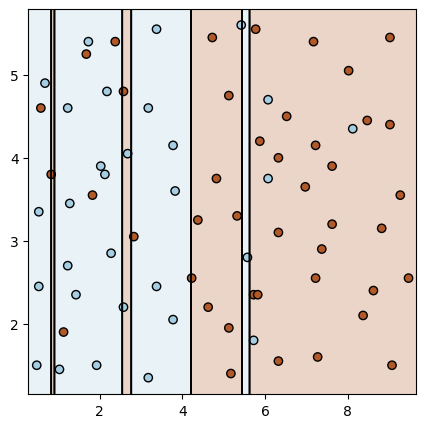

In [31]:
plot_decision_boundary(pipe, X_train,y_train)

## Round 5

### TRAIN
- You can (and should!) include feature selection in the pipeline

In [37]:
from sklearn.linear_model import LogisticRegression

pl=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier',KNeighborsClassifier())
])

my_param_grid = [
    {
     'imputer__strategy': ['mean', 'median'],
     'feature_selection__k': [1,2],
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': [1, 3, 5],
    },
    {
     'imputer__strategy': ['mean', 'median'],
     'feature_selection__k': [1,2],
     'classifier': [LogisticRegression(random_state=42)],
     'classifier__C': [0.01, 0.1, 1.0, 10.0, 100.0]
    }
]

cv = GridSearchCV(pl, 
                  param_grid = my_param_grid,
                  scoring = 'accuracy', refit = True,
                  cv = 3,
                 return_train_score=True)

cv.fit(X_train,y_train)

cv_results = pd.DataFrame(cv.cv_results_).sort_values(by="rank_test_score")
display(cv_results[['param_imputer__strategy','param_feature_selection__k',
                    'param_classifier','param_classifier__n_neighbors', 'param_classifier__C', 
                    'mean_train_score', 'mean_test_score', 'rank_test_score']])
print(cv.best_estimator_.get_params())

# WATCH OUT!
with open(os.path.join('pkl','round_5','pipeline.pkl'),'wb') as f:
    pickle.dump(cv.best_estimator_,f)

cv

,param_imputer__strategy,param_feature_selection__k,param_classifier,param_classifier__n_neighbors,param_classifier__C,mean_train_score,mean_test_score,rank_test_score
29,median,1,LogisticRegression(random_state=42),NaN,100.0,0.763007,0.763077,1
28,mean,1,LogisticRegression(random_state=42),NaN,100.0,0.763007,0.763077,1
25,median,1,LogisticRegression(random_state=42),NaN,10.0,0.763007,0.763077,1
24,mean,1,LogisticRegression(random_state=42),NaN,10.0,0.763007,0.763077,1
21,median,1,LogisticRegression(random_state=42),NaN,1.0,0.763007,0.763077,1
20,mean,1,LogisticRegression(random_state=42),NaN,1.0,0.763007,0.763077,1
31,median,2,LogisticRegression(random_state=42),NaN,100.0,0.749804,0.762564,7
27,median,2,LogisticRegression(random_state=42),NaN,10.0,0.749804,0.762564,7
26,mean,2,LogisticRegression(random_state=42),NaN,10.0,0.749804,0.762564,7
22,mean,2,LogisticRegression(random_state=42),NaN,1.0,0.743268,0.762564,7


{'memory': None, 'steps': [('scaler', StandardScaler()), ('imputer', SimpleImputer()), ('feature_selection', SelectKBest(k=1)), ('classifier', LogisticRegression(random_state=42))], 'verbose': False, 'scaler': StandardScaler(), 'imputer': SimpleImputer(), 'feature_selection': SelectKBest(k=1), 'classifier': LogisticRegression(random_state=42), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'imputer__add_indicator': False, 'imputer__copy': True, 'imputer__fill_value': None, 'imputer__missing_values': nan, 'imputer__strategy': 'mean', 'imputer__verbose': 0, 'feature_selection__k': 1, 'feature_selection__score_func': <function f_classif at 0x177e79ee0>, 'classifier__C': 1.0, 'classifier__class_weight': None, 'classifier__dual': False, 'classifier__fit_intercept': True, 'classifier__intercept_scaling': 1, 'classifier__l1_ratio': None, 'classifier__max_iter': 100, 'classifier__multi_class': 'auto', 'classifier__n_jobs': None, 'classifier__penalty': 'l2', 'classif

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('imputer', SimpleImputer()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [1, 3, 5],
                          'feature_selection__k': [1, 2],
                          'imputer__strategy': ['mean', 'median']},
                         {'classifier': [LogisticRegression(random_state=42)],
                          'classifier__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                          'feature_selection__k': [1, 2],
                          'imputer__strategy': ['mean', 'median']}],
             return_train_score=True, scoring='accuracy')

/Users/irene/Documents/environments/env_pydata_sklearn_1_0/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


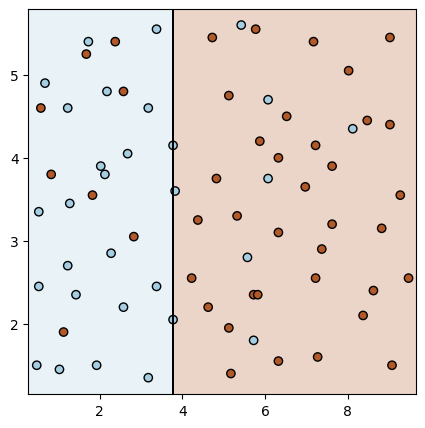

In [35]:
plot_decision_boundary(cv.best_estimator_, X_train,y_train)

### TEST

In [38]:
with open(os.path.join('pkl','round_5','pipeline.pkl'), 'rb') as f:
    pipe = pickle.load(f)

print("Accuracy in test: ", accuracy_score(y_test, pipe.predict(X_test)))

Accuracy in test:  0.75
